# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [48]:
output_data_file = "../output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [49]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?id=524901&units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []


print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
        # Parse the JSON and retrieve data
        
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | clovis
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | lompoc
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | nome
Processing Record 7 of Set 1 | codo
Processing Record 8 of Set 1 | coxim
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | lannion
Processing Record 14 of Set 1 | praya
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | kieta
Processing Record 17 of Set 1 | yerofey pavlovich
Processing Record 18 of Set 1 | sorong
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | dabat
Processing Record 21 of Set 1

Processing Record 39 of Set 4 | beringovskiy
Processing Record 40 of Set 4 | high level
Processing Record 41 of Set 4 | george
Processing Record 42 of Set 4 | pogar
Processing Record 43 of Set 4 | camacha
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | fort nelson
Processing Record 46 of Set 4 | metsavan
Processing Record 47 of Set 4 | butaritari
Processing Record 48 of Set 4 | irbil
Processing Record 49 of Set 4 | faya
Processing Record 0 of Set 5 | smithers
Processing Record 1 of Set 5 | saint george
Processing Record 2 of Set 5 | gat
Processing Record 3 of Set 5 | merauke
Processing Record 4 of Set 5 | kuche
City not found. Skipping...
Processing Record 5 of Set 5 | oranjemund
Processing Record 6 of Set 5 | pevek
Processing Record 7 of Set 5 | villazon
Processing Record 8 of Set 5 | colac
Processing Record 9 of Set 5 | port-gentil
Processing Record 10 of Set 5 | guerrero negro
Processing Record 11 of Set 5 | damietta
Processing Record 12 of Set 5 | ka

Processing Record 28 of Set 8 | kavieng
Processing Record 29 of Set 8 | rio grande
Processing Record 30 of Set 8 | gayny
Processing Record 31 of Set 8 | chicama
Processing Record 32 of Set 8 | karratha
Processing Record 33 of Set 8 | mayumba
Processing Record 34 of Set 8 | bikin
Processing Record 35 of Set 8 | alakurtti
Processing Record 36 of Set 8 | la libertad
Processing Record 37 of Set 8 | saleaula
City not found. Skipping...
Processing Record 38 of Set 8 | meadow lake
Processing Record 39 of Set 8 | marzuq
Processing Record 40 of Set 8 | amderma
City not found. Skipping...
Processing Record 41 of Set 8 | labuhan
Processing Record 42 of Set 8 | sandur
Processing Record 43 of Set 8 | nantucket
Processing Record 44 of Set 8 | san angelo
Processing Record 45 of Set 8 | zapolyarnyy
Processing Record 46 of Set 8 | yirol
City not found. Skipping...
Processing Record 47 of Set 8 | sept-iles
Processing Record 48 of Set 8 | jaragua
Processing Record 49 of Set 8 | moranbah
Processing Record

Processing Record 10 of Set 12 | kendari
Processing Record 11 of Set 12 | methoni
Processing Record 12 of Set 12 | pa sang
Processing Record 13 of Set 12 | sovetskiy
Processing Record 14 of Set 12 | ranfurly
Processing Record 15 of Set 12 | oistins
Processing Record 16 of Set 12 | juneau
Processing Record 17 of Set 12 | satitoa
City not found. Skipping...
Processing Record 18 of Set 12 | cockburn town
Processing Record 19 of Set 12 | nam tha
City not found. Skipping...
Processing Record 20 of Set 12 | chake chake
Processing Record 21 of Set 12 | barcelona
Processing Record 22 of Set 12 | bahia honda
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | bage
Processing Record 25 of Set 12 | hendek
Processing Record 26 of Set 12 | halalo
City not found. Skipping...
Processing Record 27 of Set 12 | ushibuka
Processing Record 28 of Set 12 | turochak
Processing Record 29 of Set 12 | cabedelo
Processing Record 30 of Set 12 | teahupoo
Processing Record 31 of Set 12 | roald


In [51]:
len(city_data)

544

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,clovis,36.8252,-119.7029,68.67,37,100,11.50,US,1675551206
1,mount gambier,-37.8333,140.7667,59.36,72,100,3.87,AU,1675551206
2,severo-kurilsk,50.6789,156.1250,27.32,72,100,5.86,RU,1675551174
3,lompoc,34.6391,-120.4579,69.94,73,40,9.22,US,1675551207
4,nome,64.5011,-165.4064,12.27,92,100,0.00,US,1675551094


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,clovis,36.8252,-119.7029,68.67,37,100,11.50,US,1675551206
1,mount gambier,-37.8333,140.7667,59.36,72,100,3.87,AU,1675551206
2,severo-kurilsk,50.6789,156.1250,27.32,72,100,5.86,RU,1675551174
3,lompoc,34.6391,-120.4579,69.94,73,40,9.22,US,1675551207
4,nome,64.5011,-165.4064,12.27,92,100,0.00,US,1675551094


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

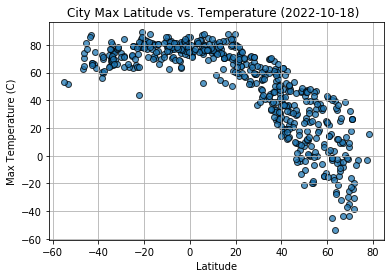

In [57]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", 
           alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022-10-18)  ")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

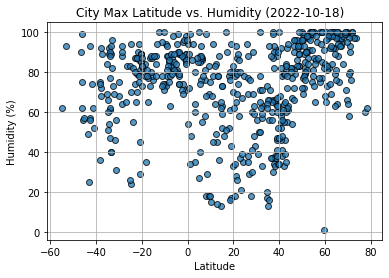

In [58]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", 
           linewidth=1,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Humidity (2022-10-18)  ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

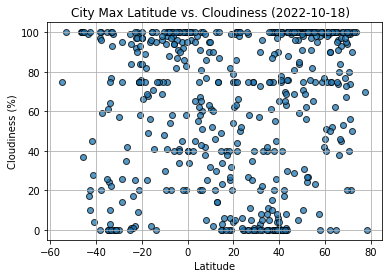

In [59]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", 
           linewidth=1,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)  ")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

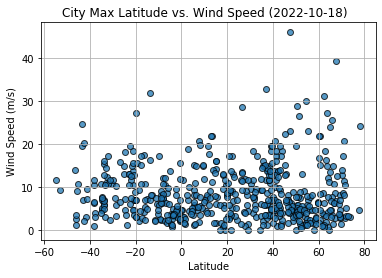

In [60]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", 
           linewidth=1,alpha=.75, edgecolors="k")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)  ")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [62]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

In [63]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,clovis,36.8252,-119.7029,68.67,37,100,11.50,US,1675551206
2,severo-kurilsk,50.6789,156.1250,27.32,72,100,5.86,RU,1675551174
3,lompoc,34.6391,-120.4579,69.94,73,40,9.22,US,1675551207
4,nome,64.5011,-165.4064,12.27,92,100,0.00,US,1675551094
7,tasiilaq,65.6145,-37.6368,24.96,88,100,25.66,GL,1675551206


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mount gambier,-37.8333,140.7667,59.36,72,100,3.87,AU,1675551206
5,codo,-4.4553,-43.8856,76.55,81,87,3.69,BR,1675551212
6,coxim,-18.5067,-54.7600,77.04,84,89,2.08,BR,1675551212
8,bluff,-46.6000,168.3333,62.46,90,100,13.98,NZ,1675551213
9,vaini,-21.2000,-175.2000,80.76,94,75,18.41,TO,1675551213


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.7199316618379514


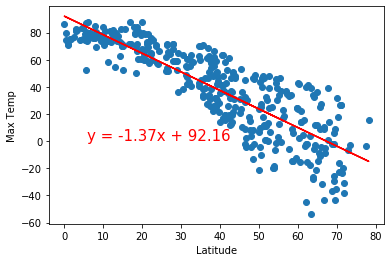

In [69]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")

plt.show()

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.17827697396059847


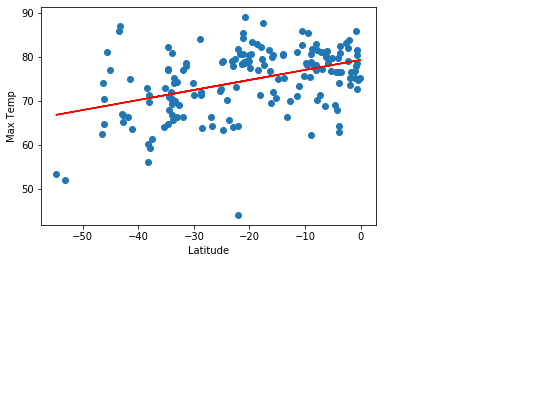

In [70]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.16372891339215206


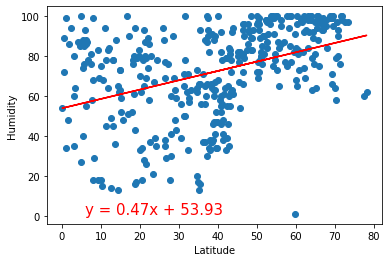

In [71]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")

plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.15516893482215555


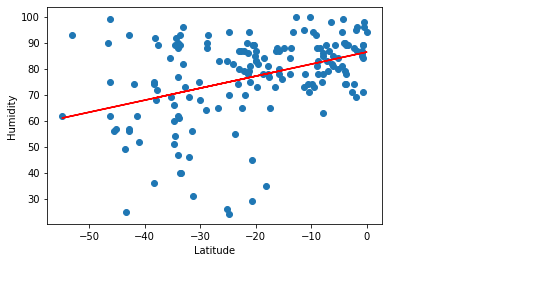

In [72]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0689144118350287


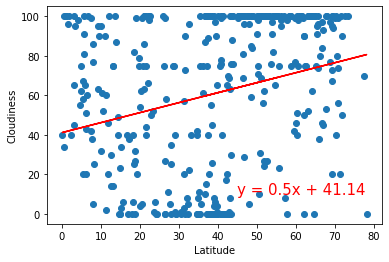

In [76]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")

plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.08044648009527056


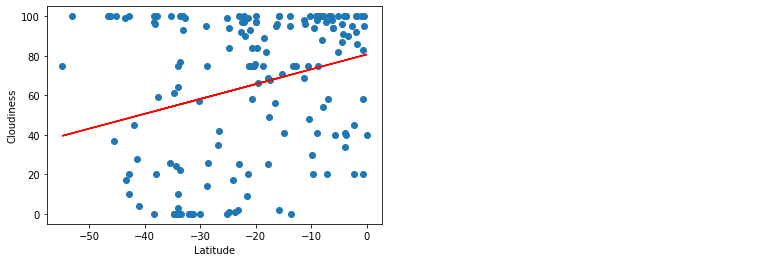

In [77]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.00022227880917482747


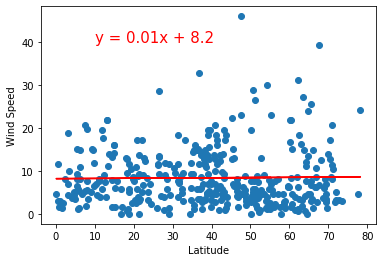

In [81]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")

plt.show()

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

The r-value is: 0.04626857620755203


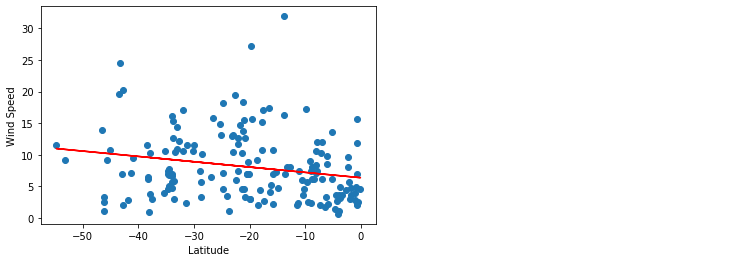

In [80]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE